In [310]:
#Import libaries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# UFC Fighters

![](https://cdn.vox-cdn.com/thumbor/z_CMbdCm8HZrJh-lKL3GGjSKM-8=/0x0:2440x1627/1200x800/filters:focal(1212x228:1602x618)/cdn.vox-cdn.com/uploads/chorus_image/image/65759283/110_Robbie_Lawler_x_Ben_Askren.0.jpg)

## A. INTRODUCTION:
**What is UFC?**
- The Ultimate Fighting Championship is a mixed-martial arts promotion in which a series of fights take place around the world, also known as fight nights. It calls itself the "premier organisation in MMA".
- UFC brings together some of the world's best mixed martial artists, fighting each other at different weights with a main event taking place once a month. There are more than 40 events each year.

**When was it formed?**
- UFC was started in the US in 1993 and was sanctioned by Nevada Athletic Commission in 2001.

## B. OVERVIEW

### 1. Load data .

Data includes 2 CSV files:
- Fighters
- Matches

In [2]:
fighters = pd.read_csv('fighters.csv')
matches = pd.read_csv('matches.csv')

### 2. Let's check the dataset.
There was 3313 totals fighters in the dataset and 5144 total matches.

In [3]:
print('Numbers of fighters:',fighters.shape[0],', Numbers of matches:', matches.shape[0])

Numbers of fighters: 3313 , Numbers of matches: 5144


### Sample of Dataset

In [4]:
fighters.sample(5)

,fighter_name,Height,Weight,Reach,Stance,DOB
3060,Tim Credeur,"6' 3""",185 lbs.,"75""",Orthodox,"Jul 09, 1977"
1269,Ian Loveland,"5' 8""",145 lbs.,NaN,Orthodox,"Sep 07, 1983"
130,Alexandre Franca Nogueira,"5' 7""",145 lbs.,NaN,Orthodox,"Jan 15, 1978"
3070,Tim Stout,"5' 11""",185 lbs.,NaN,NaN,"Feb 09, 1979"
1155,Giga Chikadze,"6' 0""",145 lbs.,"72""",Orthodox,"Aug 25, 1988"


In [5]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   Height        3050 non-null   object
 2   Weight        3238 non-null   object
 3   Reach         1569 non-null   object
 4   Stance        2439 non-null   object
 5   DOB           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


In [6]:
matches.sample(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
694,Kalindra Faria,Jessica Eye,Dan Miragliotta,2018-01-14,"St. Louis, Missouri, USA",Blue,False,Women's Flyweight,3,4.0,...,0.0,0.0,0.0,0.0,Switch,170.18,NaN,125.0,31.0,31.0
1971,Yves Jabouin,Thomas Almeida,Yves Lavigne,2015-04-25,"Montreal, Quebec, Canada",Blue,False,Bantamweight,3,0.0,...,0.0,0.0,0.0,5.0,Orthodox,170.18,172.72,135.0,23.0,35.0
2411,Erik Perez,Bryan Caraway,Raul Porrata,2014-06-07,"Albuquerque, New Mexico, USA",Blue,False,Bantamweight,3,0.0,...,2.0,1.0,0.0,4.0,Orthodox,172.72,172.72,135.0,29.0,24.0
4359,Kenny Florian,Din Thomas,Mario Yamasaki,2007-09-19,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,0.0,...,1.0,3.0,1.0,5.0,Southpaw,177.80,187.96,145.0,30.0,31.0
1508,Robert Whittaker,Rafael Natal,John McCarthy,2016-04-23,"Las Vegas, Nevada, USA",Red,False,Middleweight,3,0.0,...,3.0,0.0,0.0,6.0,Orthodox,182.88,185.42,185.0,33.0,25.0


In [7]:
matches.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


### Overview through Visualization

- ####  Overview of matches

#### The numbers of matches per year

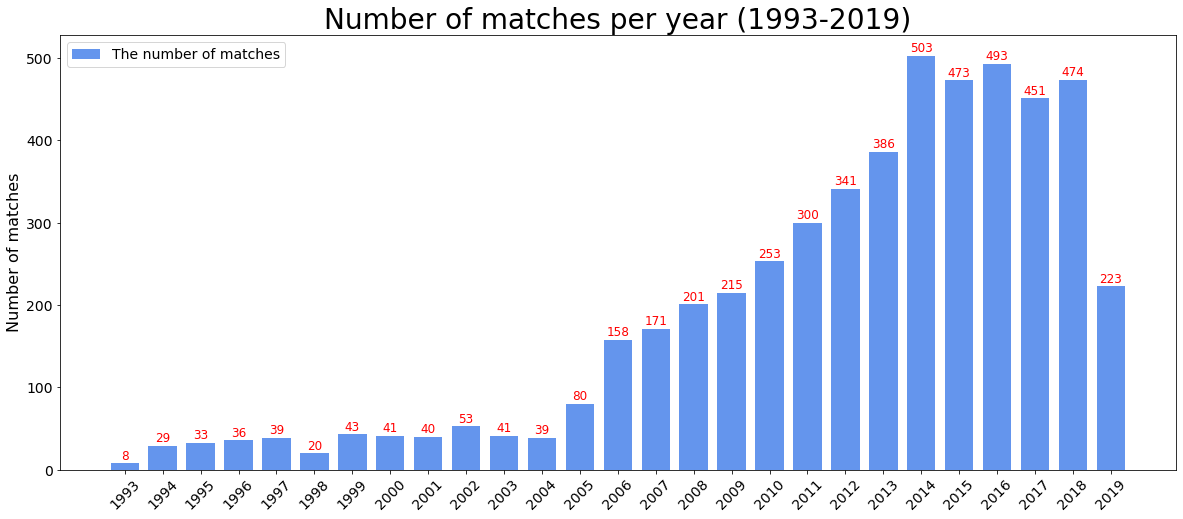

In [173]:
# Draw the chart that sum all the matches for each year
matches_number = matches['date'].apply(lambda x: x.split('-')[0]).value_counts().sort_index().to_frame()

fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(matches_number.index.to_list(), matches_number['date'], width=0.75, label = 'The number of matches', color ='cornflowerblue')
# plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of matches', fontsize = 16)
plt.legend(loc = 2, fontsize = 14)
plt.title('Number of matches per year (1993-2019)', fontsize = 28)

plt.yticks(np.arange(0,600,100), fontsize = 14)
plt.xticks(fontsize=14, rotation = 45)

for i in range(len(matches_number)):
    ax.text(matches_number.index[i], 
            matches_number.date[i] + 1, 
            matches_number.date[i], 
            color = 'r', 
            fontsize = 12, 
            horizontalalignment = 'center', 
            verticalalignment = 'bottom'
           )
    
plt.show()

- The number of matches significant increase from 1997 after meeting their peak at 2014 they slightly decline through and stop at middle 2019 due to the covid-19

#### The numbers of matches per country

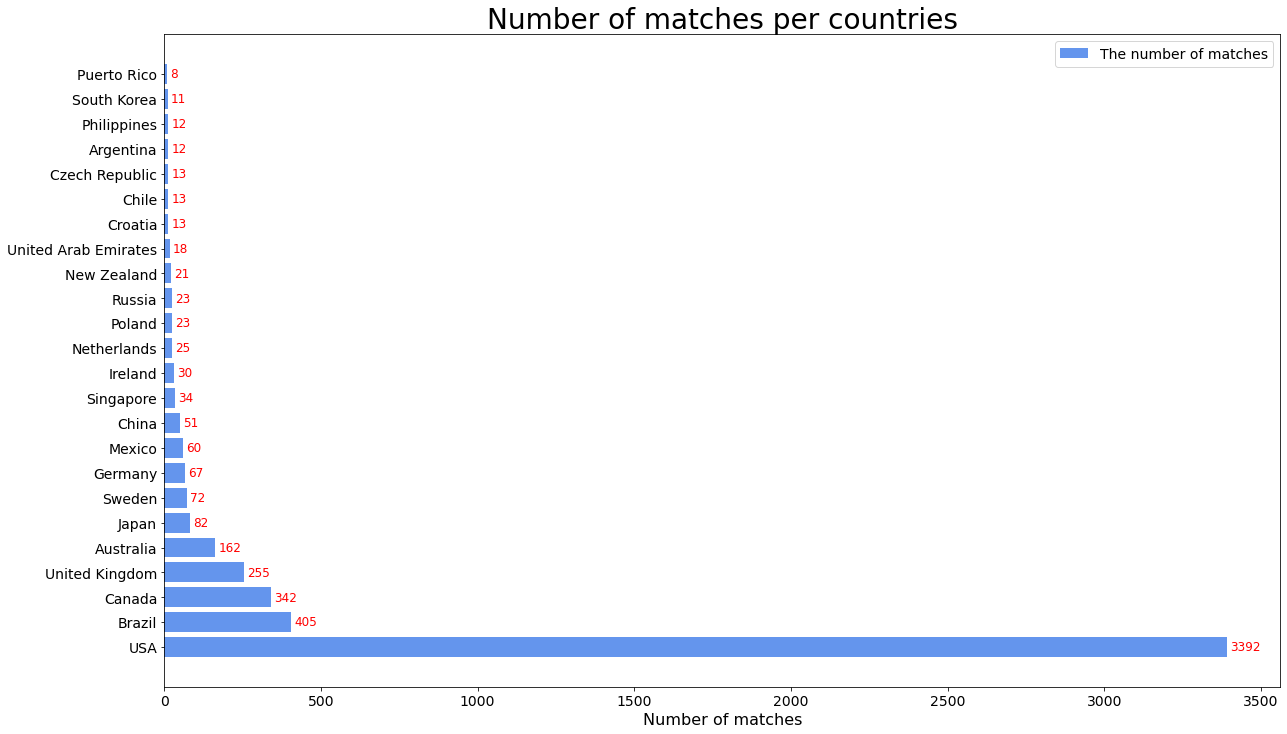

In [182]:
country_matches_number = matches['location'].apply(lambda x: x.split(', ')[-1]).value_counts().to_frame()

fig, ax = plt.subplots(figsize=(20, 12))
plt.barh(country_matches_number.index.to_list(), country_matches_number['location'], label = 'The number of matches', color ='cornflowerblue')

plt.xlabel('Number of matches', fontsize = 16)
plt.legend(loc = 1, fontsize = 14)
plt.title('Number of matches per countries', fontsize = 28)

plt.yticks(fontsize = 14)
plt.xticks(np.arange(0,4000,500), fontsize=14, rotation = 0)

for i in range(len(country_matches_number)):
    ax.text( 
            country_matches_number.location[i]+10,
            i,
            country_matches_number.location[i], 
            color = 'r', 
            fontsize = 12, 
            horizontalalignment = 'left', 
            verticalalignment = 'center'
           )
    
plt.show()

-  USA Sweden and Brazil is the top 3 of country that most of the matches was hosted

#### Matches per Weight Class. 
- Which weight class is the most popular?

*Weight class in UFC*
- Bantamweight: 135 lb (61.2 kg)
- Catch Weight: can negotiate the weight to fight (ex: Bantamweight vs flyweight)
- Featherweight: 145 lb (65.8 kg)
- Flyweight: 125 lb (56.7 kg)
- Heavyweight: 265 lb (120.2 kg)
- Light Heavyweight: 205 lb (93.0 kg)
- Lightweight: 155 lb (70.3 kg)
- Middleweight: 185 lb (83.9 kg)
- Welterweight: 170 lb (77.1 kg)
- Super lightweight: 165 lb (74.8 kg)
- Women's Bantamweight: 135 lb (61.2 kg)
- Women's Featherweight: 145 lb (65.8 kg)
- Women's Flyweight: 125 lb (56.7 kg)
- Women's Strawweight: 115 lb (52.2 kg)

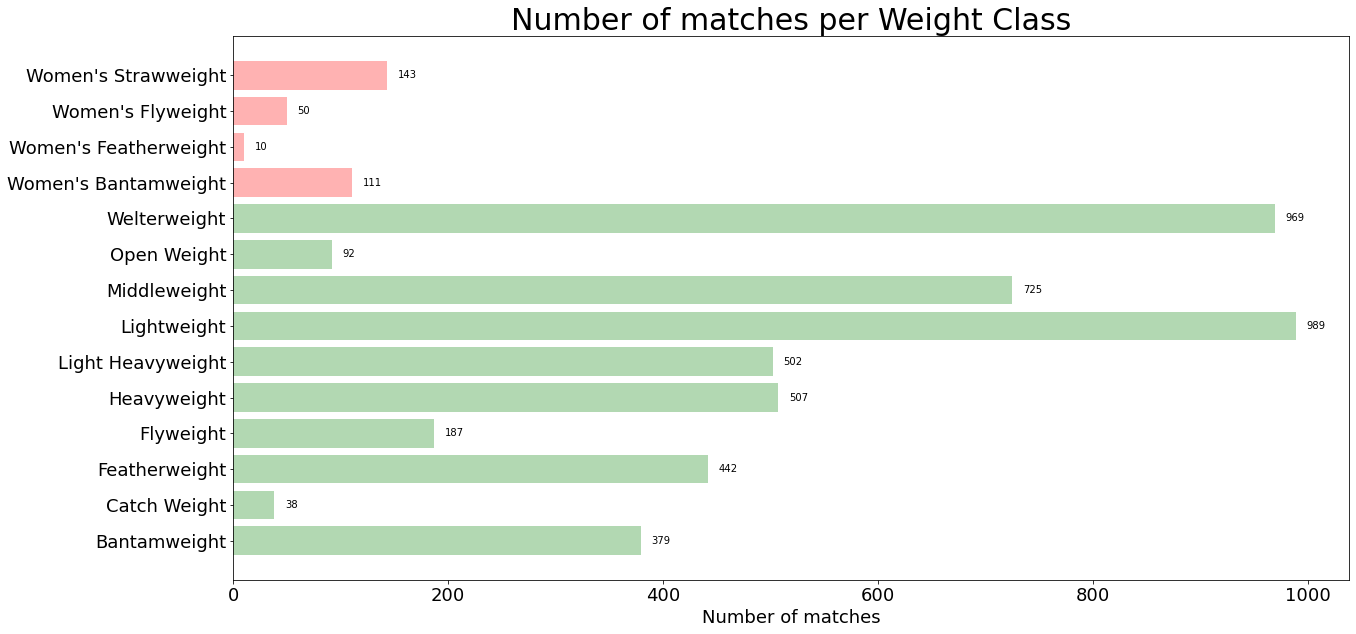

In [231]:
matches_by_weight_class = matches['weight_class'].value_counts().to_frame().sort_index()

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot()

x = matches_by_weight_class.index.to_list()
y = matches_by_weight_class.weight_class.to_list()

for x_, y_ in zip(x, y):
    ax.barh(x_, y_, color = "red" if y_ in [111,10,50,143] else "green", alpha = 0.3)

for i in range(len(y)):
    ax.text(y[i] + 10, i , round(y[i], 1), horizontalalignment = 'left', verticalalignment = 'center')

# ax.set_xticklabels(x, rotation = 90, fontsize = 18)
plt.xticks(fontsize = 18, rotation = 0)
plt.xlabel('Number of matches', fontsize = 18)

# ax.set_ylabel("Class Weight", fontsize = 25)
plt.yticks(fontsize = 18, rotation = 0)

plt.title('Number of matches per Weight Class', fontsize = 30);

- There are 9 weight classes for men and 4 weight classes for women.
- Most of the fighters are in Lightweight and Welterweight for men and Strawweight for women

- #### Overview of fighters

#### Fighters' Stances

In [275]:
# use tree map to draw graph
!pip install squarify 
import squarify  # to draw tree map

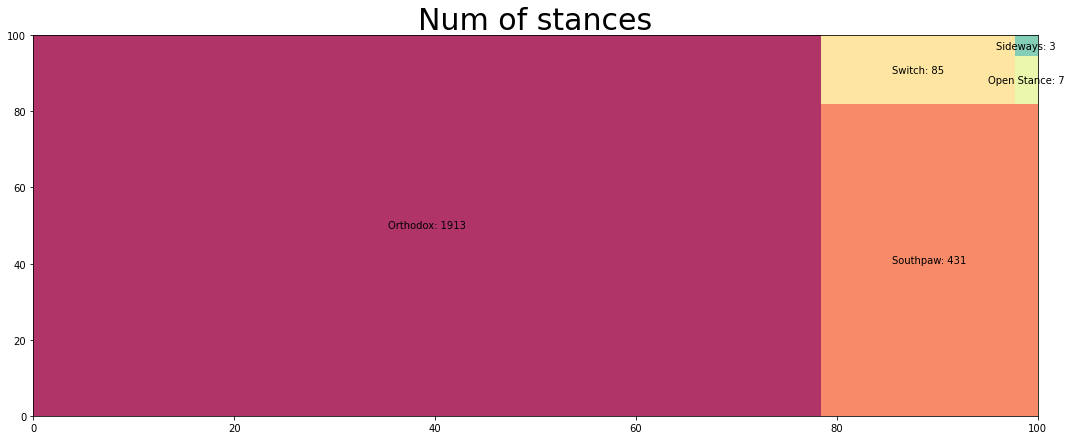

In [276]:
fighters_stances = fighters['Stance'].value_counts().to_frame()

labels = ["{}: {}".format(stance_, n) for stance_, n in zip(fighters_stances.index.to_list(), fighters_stances.Stance.to_list())]
colors = [plt.cm.Spectral(i/int(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 7))
squarify.plot(sizes = fighters['Stance'].value_counts(normalize=True).to_list(), label = labels,  color = colors, alpha = 0.8)
# (normalize=True) -> convert to percentages
plt.title("Num of stances", fontsize = 30);

- There are 5 stances. Orthodox is the most commonly used stance

## C. CLEANING DATA

#### Check missing data

We focus on the columns that are important to the result and big Question.
First of all, idetifying number NaN values in Dataset.

In [287]:
print("Total NaN in dataframe :" , matches.isna().sum().sum())
print("Total NaN in each column of the dataframe")

na = []

for index, col in enumerate(matches):
    na.append((index, matches[col].isna().sum()))

na.sort(key = lambda x: x[1], reverse = True)

for i in range(len(matches.columns)):
    print(matches.columns[na[i][0]],":", na[i][1], "NaN")

Total NaN in dataframe : 95390
Total NaN in each column of the dataframe
B_avg_BODY_att : 1265 NaN
B_avg_BODY_landed : 1265 NaN
B_avg_CLINCH_att : 1265 NaN
B_avg_CLINCH_landed : 1265 NaN
B_avg_DISTANCE_att : 1265 NaN
B_avg_DISTANCE_landed : 1265 NaN
B_avg_GROUND_att : 1265 NaN
B_avg_GROUND_landed : 1265 NaN
B_avg_HEAD_att : 1265 NaN
B_avg_HEAD_landed : 1265 NaN
B_avg_KD : 1265 NaN
B_avg_LEG_att : 1265 NaN
B_avg_LEG_landed : 1265 NaN
B_avg_PASS : 1265 NaN
B_avg_REV : 1265 NaN
B_avg_SIG_STR_att : 1265 NaN
B_avg_SIG_STR_landed : 1265 NaN
B_avg_SIG_STR_pct : 1265 NaN
B_avg_SUB_ATT : 1265 NaN
B_avg_TD_att : 1265 NaN
B_avg_TD_landed : 1265 NaN
B_avg_TD_pct : 1265 NaN
B_avg_TOTAL_STR_att : 1265 NaN
B_avg_TOTAL_STR_landed : 1265 NaN
B_avg_opp_BODY_att : 1265 NaN
B_avg_opp_BODY_landed : 1265 NaN
B_avg_opp_CLINCH_att : 1265 NaN
B_avg_opp_CLINCH_landed : 1265 NaN
B_avg_opp_DISTANCE_att : 1265 NaN
B_avg_opp_DISTANCE_landed : 1265 NaN
B_avg_opp_GROUND_att : 1265 NaN
B_avg_opp_GROUND_landed : 1265 N

In [288]:
matches.shape

(5144, 145)

#### Drop columns which are not affect to results of matches

In [293]:
matches.drop(columns = ['Referee', 'date', 'location', 'title_bout'], inplace = True)

**Drop all rows contain Null value**

In [294]:
matches.dropna(axis = 0, how = 'any', inplace = True)

In [295]:
matches

,R_fighter,B_fighter,Winner,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Red,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Red,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Red,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Blue,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Blue,Heavyweight,3,0.0,1.0,0.0,17.000000,14.500000,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,Tito Ortiz,Evan Tanner,Red,Light Heavyweight,5,0.0,3.0,0.0,7.666667,6.666667,...,2.0,1.0,1.0,5.0,Orthodox,190.50,187.96,205.0,30.0,26.0
4901,Chuck Liddell,Jeff Monson,Red,Middleweight,3,0.0,1.0,0.0,12.000000,10.000000,...,0.0,0.0,1.0,2.0,Orthodox,187.96,193.04,205.0,29.0,30.0
4923,Tito Ortiz,Wanderlei Silva,Red,Light Heavyweight,5,0.0,1.0,0.0,7.000000,6.500000,...,2.0,0.0,1.0,3.0,Orthodox,190.50,187.96,205.0,23.0,25.0
4967,Jeremy Horn,Chuck Liddell,Red,Middleweight,2,0.0,1.0,0.0,9.000000,6.000000,...,0.0,0.0,0.0,0.0,Orthodox,185.42,187.96,185.0,29.0,23.0


**Divided table 'matches' into 2 tables 'women_matches' and 'men_matches'**

In [297]:
women_matches = matches[matches['weight_class'].str.contains('Women')]
women_matches.shape

(156, 141)

In [299]:
men_matches = matches[~matches['weight_class'].str.contains('Women')]
men_matches.shape

(3059, 141)

- matches: contains information of all matches

- women_matches: contains information of women's matches

- men_matches: contains information of men's matches

## D. ANALYSIS DATA

#### Win Rate Between Red/Blue fighter

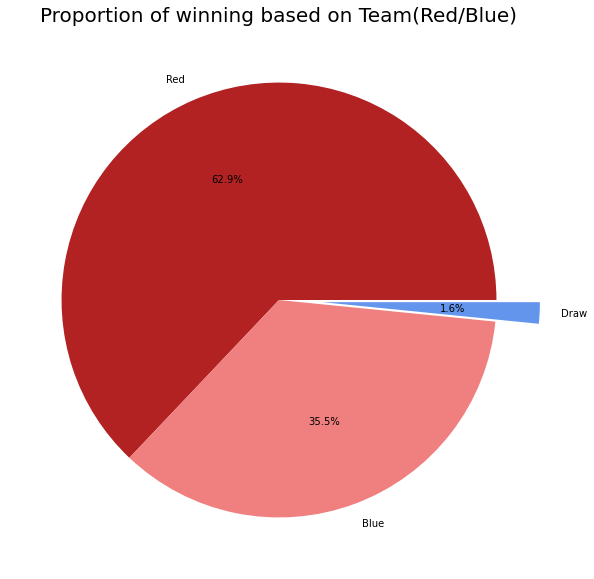

In [307]:
#total winner of total match (base on red or blue fighter)
plt.figure(figsize = (10,10))

pies = matches['Winner'].value_counts()
labels = ['Red', 'Blue', 'Draw']

Explode = [0, 0, 0.2]
colors = ['firebrick','lightcoral', 'cornflowerblue']

plt.pie(pies, autopct = '%1.1f%%', labels = labels, colors = colors, explode = Explode)
plt.title('Proportion of winning based on Team(Red/Blue)', fontsize =20)

plt.show()

**How Age affects Winning Rate**

- Age distribution of male and female fighters

In [325]:
male_age = pd.concat([men_matches.R_age, men_matches.B_age], ignore_index = True)
female_age = pd.concat([women_matches.R_age, women_matches.B_age], ignore_index = True)

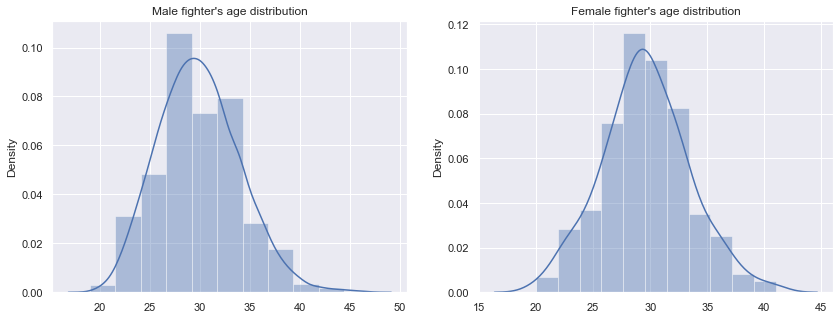

In [328]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.distplot(male_age, bins=11, ax=ax1).set_title("Male fighter's age distribution")
sns.distplot(female_age, bins=11, ax=ax2).set_title("Female fighter's age distribution")
plt.show()

- Conclusion: Popular age range of male fighters is in range of 27 - 35, and of female fighters is 27 -32 year-old

- In the age range of 27 - 35 of male fighters and 27 -32 of female fighters, do younger or older fighter have higher ratio of win?

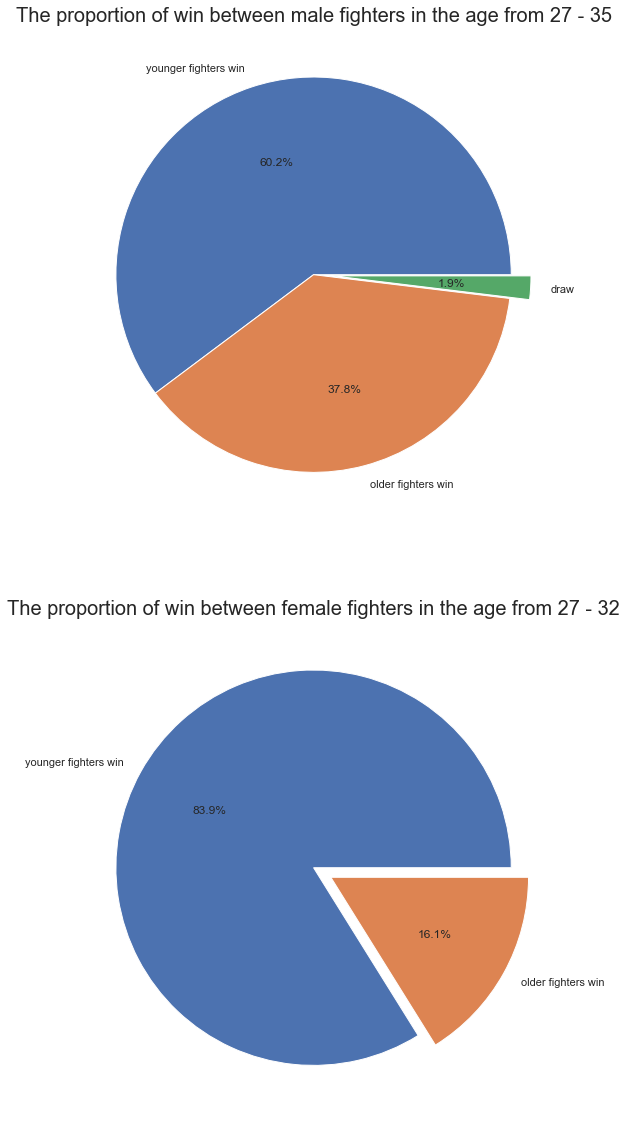

In [382]:
# Get data of male fighters who are in range of 27 -35 year-old
male_age_27_35 = men_matches[(men_matches['R_age'] > 27) & (men_matches['R_age'] < 35) & (men_matches['B_age'] > 27) & (men_matches['B_age'] < 35)]
# Get data of female fighters who are in range of 27 -32 year-old
female_age_27_32 = women_matches[(women_matches['R_age'] > 27) & (women_matches['R_age'] < 32) & (women_matches['B_age'] > 27) & (women_matches['B_age'] < 32)]

def winner_ratio(col):
    '''
    col[0]: winner column
    col[1]: Blue_age is bigger
    col[2]: Red_Age is bigger
    '''
    if col[1] > col[2] and col[0] == 'Blue':
        return 'older_fighter_win'
    elif col[1] < col[2] and col[0] == 'Red':
        return 'older_fighter_win'
    elif col[0] == 'Draw':
        return 'draw'
    else:
        return 'younger_fighters_win'

male_age_27_35['age_winner'] = male_age_27_35[['Winner', 'B_age', 'R_age']].apply(winner_ratio, axis = 1)

female_age_27_32['age_winner'] = female_age_27_32[['Winner', 'B_age', 'R_age']].apply(winner_ratio, axis = 1)

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,20))

# male
data = male_age_27_35['age_winner'].value_counts()
labels = ['younger fighters win', 'older fighters win', 'draw']
myexplode = [0, 0, 0.1]
ax1.pie(data, labels = labels, autopct = '%1.1f%%', explode = myexplode)
ax1.set_title('The proportion of win between male fighters in the age from 27 - 35', fontsize = 20)


# female
data = female_age_27_32['age_winner'].value_counts()
labels = ['younger fighters win', 'older fighters win']
myexplode = [0, 0.1]
ax2.pie(data, labels = labels, autopct = '%1.1f%%', explode = myexplode)
ax2.set_title('The proportion of win between female fighters in the age from 27 - 32', fontsize = 20)

plt.show()

- Conclusion: Both younger male & female fighters have a change of win higher older

#### Do fighters have long arm span will have a higher opportunity to win? 

- column B_Reach_cms: armspan's length of Blue fighters 
- column R_Reach_cms: armspan's length of Red fighters 

In [394]:
def winner_ratio(col):
    '''
    col[0]: winner column
    col[1]: Blue fighter armspan length
    col[2]: Red fighter armspan lenghth
    '''
    if col[1] > col[2] and col[0] == 'Blue':
        return 'longer_armspan_win'
    elif col[1] < col[2] and col[0] == 'Red':
        return 'longer_armspan_win'
    elif col[0] == 'Draw':
        return 'draw'
    else:
        return 'shorter_armspan_win'

armspan = matches.copy()
armspan['reach_win_ratio'] = armspan[['Winner', 'B_Reach_cms', 'R_Reach_cms']].apply(winner_ratio, axis = 1)
armspan['reach_win_ratio'].value_counts(normalize = True)

shorter_armspan_win    0.531260
longer_armspan_win     0.452877
draw                   0.015863
Name: reach_win_ratio, dtype: float64

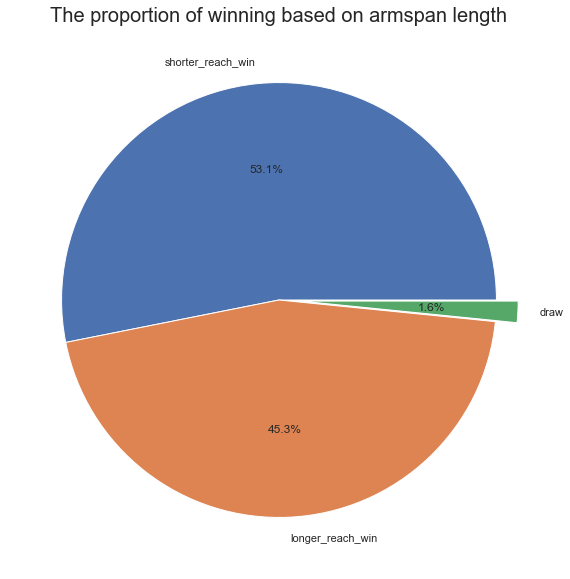

In [398]:
# Visualization
fig, ax = plt.subplots(figsize=(10,10))

data = armspan['reach_win_ratio'].value_counts()
labels = ['shorter_reach_win', 'longer_reach_win', 'draw']
myexplode = [0, 0, 0.1]
ax.pie(data, labels = labels, autopct = '%1.1f%%', explode = myexplode)
ax.set_title('The proportion of winning based on armspan length', fontsize = 20)

plt.show()

#### Fighter's Efficiency Rate

- Do efficiency rate of red fighter effect to the win rate?

<AxesSubplot:>

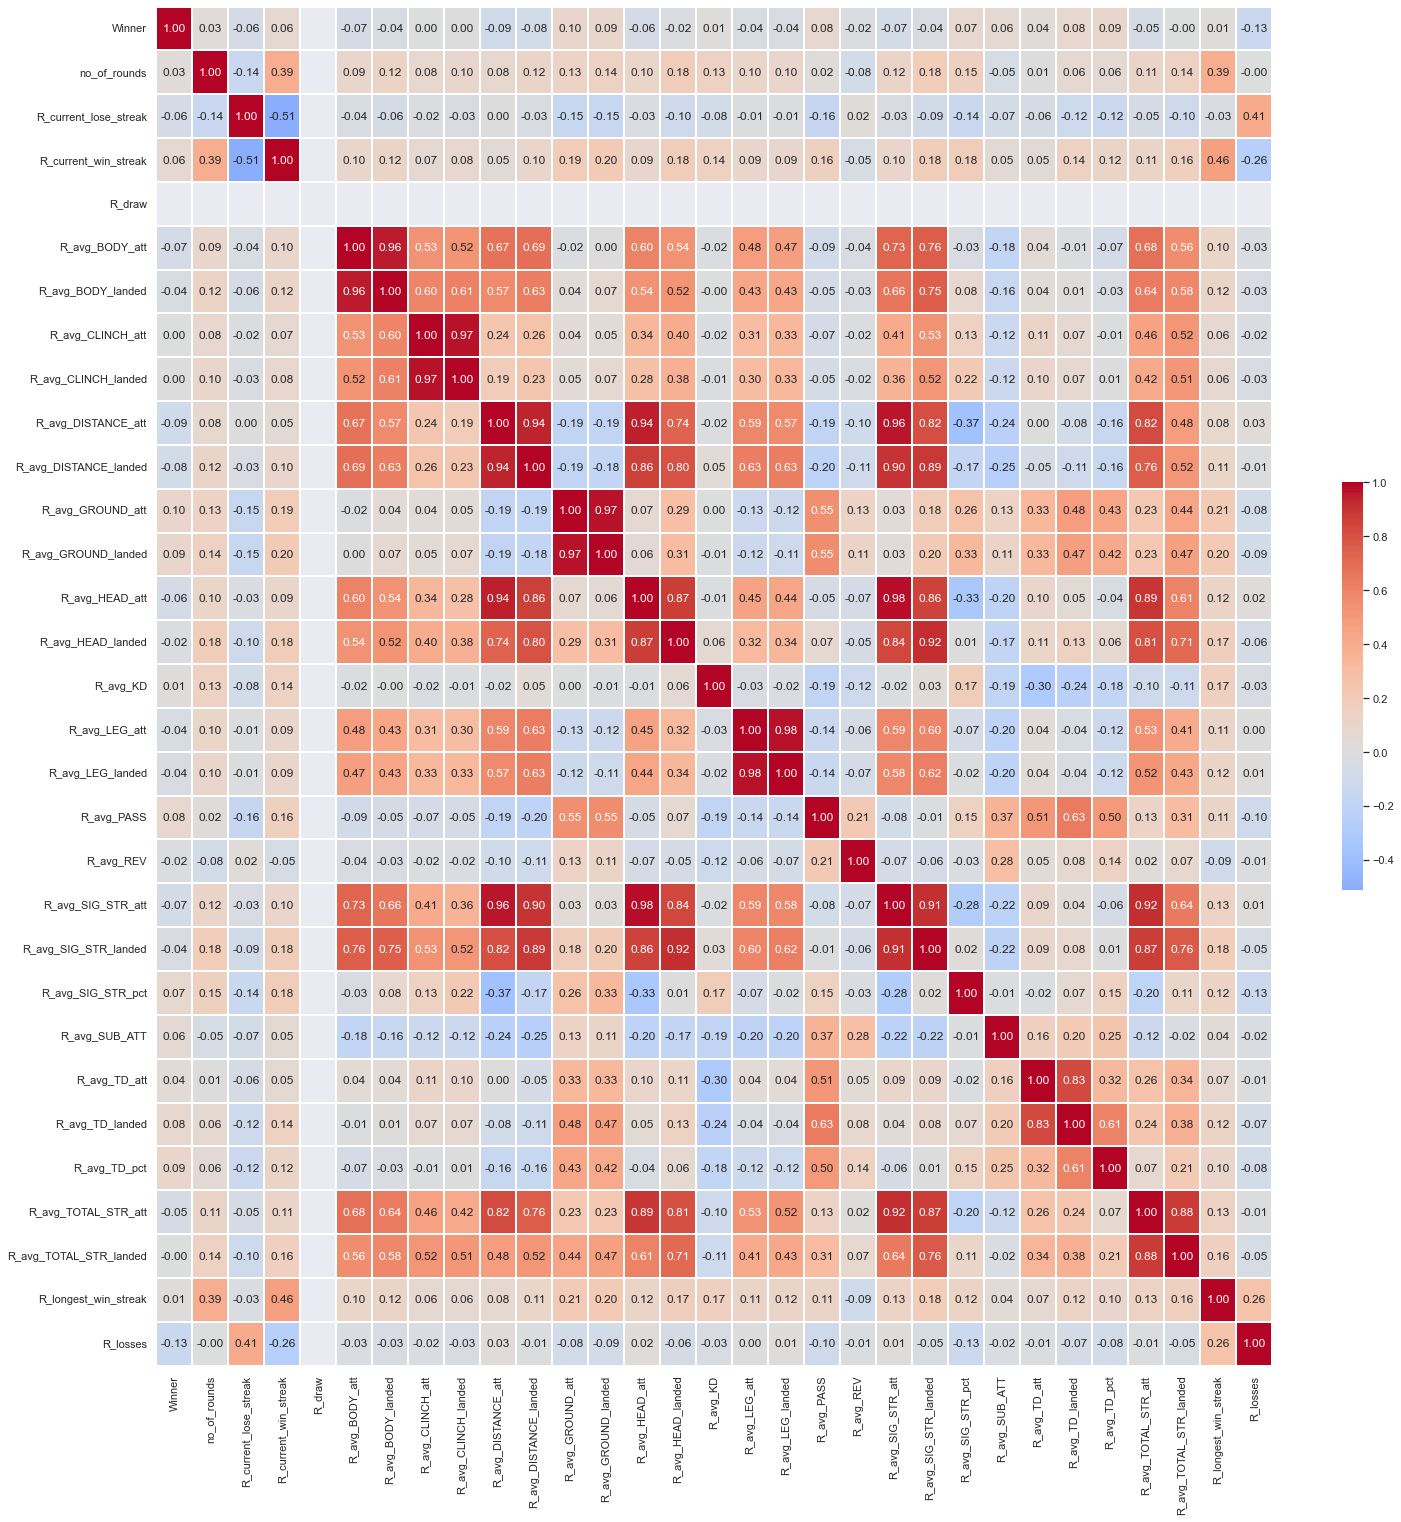

In [411]:
cols = ['Winner', 'no_of_rounds', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_CLINCH_att', 'R_avg_CLINCH_landed', 'R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_GROUND_att', 'R_avg_GROUND_landed', 'R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_KD', 'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_PASS', 'R_avg_REV', 'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_att', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_longest_win_streak', 'R_losses']
Red_team = matches[cols]

def convert_Winner_to_number(col):
    if col == 'Red':
        return 1
    elif col == 'Draw':
        return 0
    else:
        return -1

Red_team['Winner'] = Red_team['Winner'].apply(convert_Winner_to_number)

# checking correlationn variables of Red_corner's 
corr = Red_team.corr()

plt.figure(figsize = (25,25))
sns.heatmap(corr, vmax=1, center=0, fmt='.2f', cmap='coolwarm',annot=True, linewidths=.3, cbar_kws={"shrink": .3})

- Do efficiency rate of blue fighter effect to the win rate?

<AxesSubplot:>

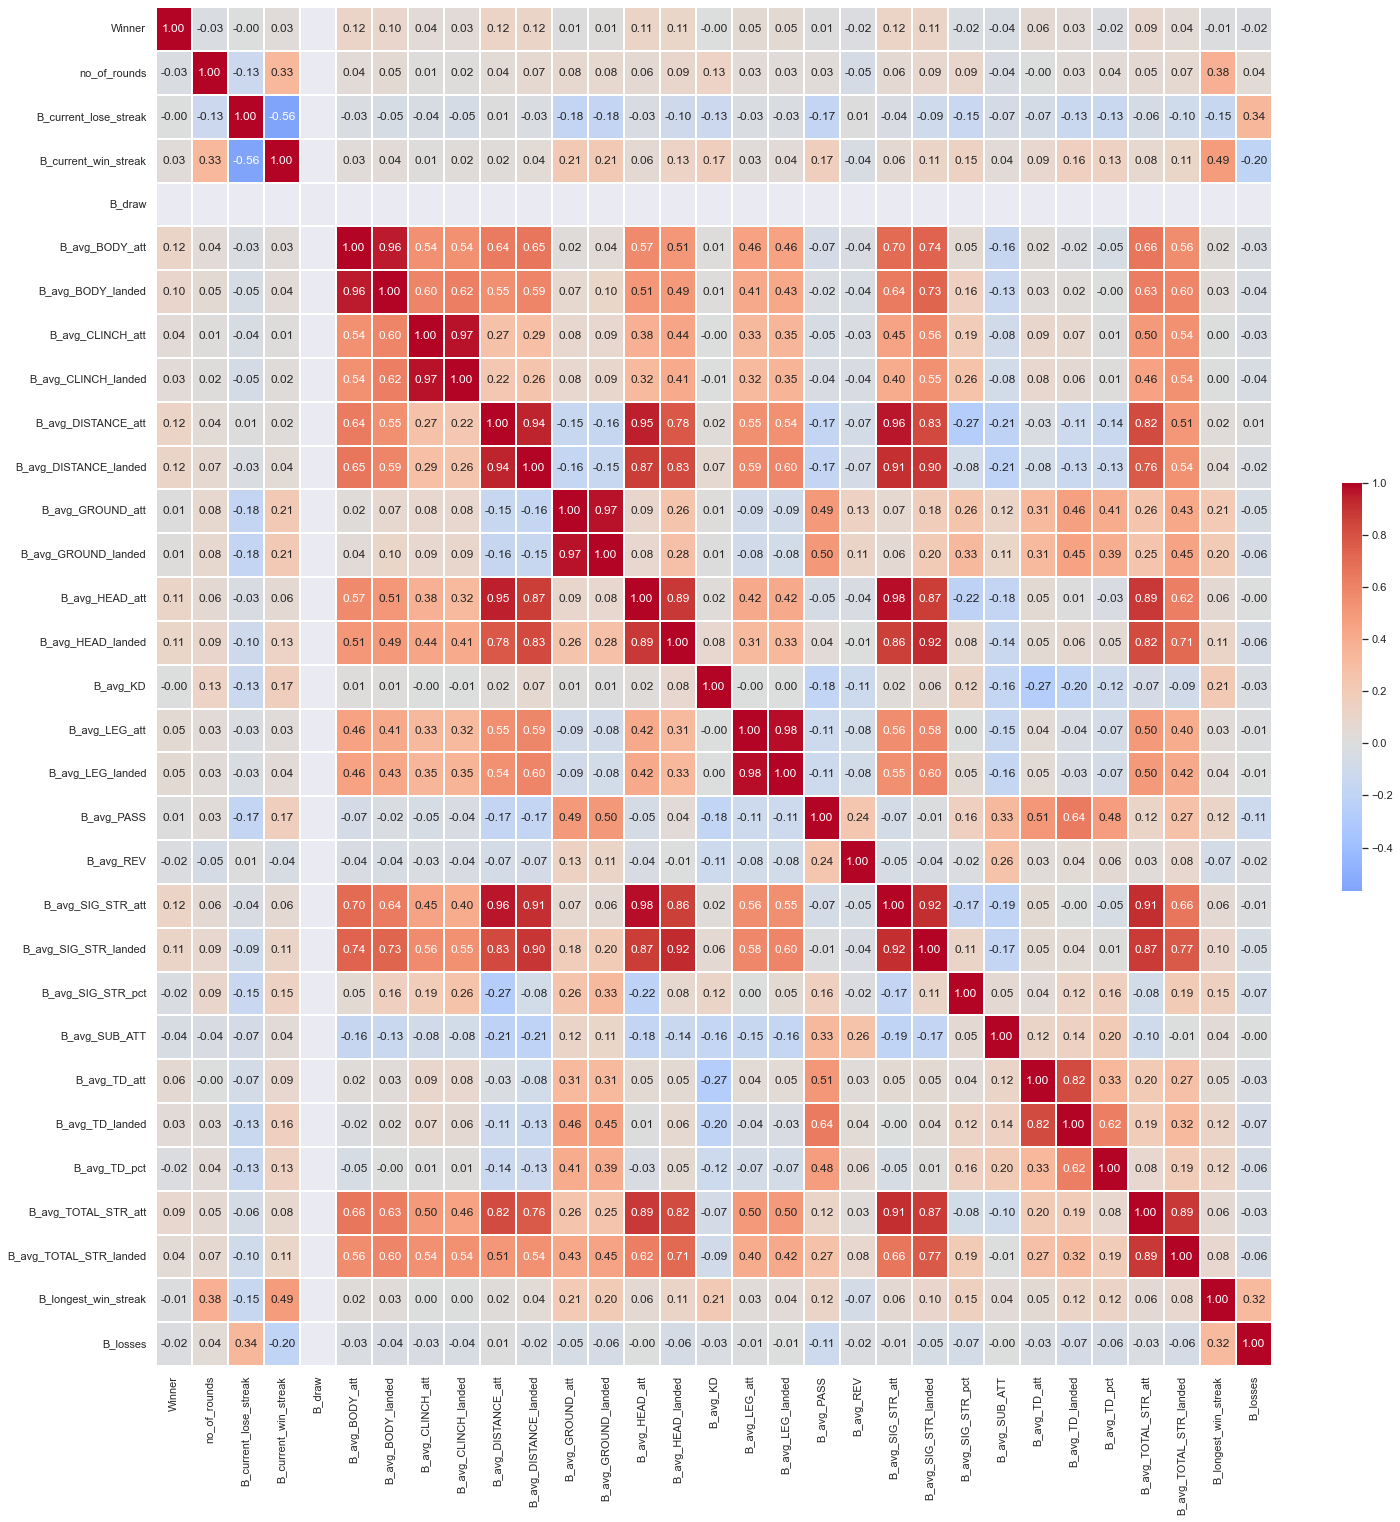

In [412]:
cols = ['Winner', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_avg_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_longest_win_streak', 'B_losses']
Blue_team = matches[cols]

def convert_Winner_to_number(col):
    if col == 'Blue':
        return 1
    elif col == 'Draw':
        return 0
    else:
        return -1

Blue_team['Winner'] = Blue_team['Winner'].apply(convert_Winner_to_number)

# checking correlationn variables of Red_corner's 
corr = Blue_team.corr()

plt.figure(figsize = (25,25))
sns.heatmap(corr, vmax=1, center=0, fmt='.2f', cmap='coolwarm',annot=True, linewidths=.3, cbar_kws={"shrink": .3})